In [6]:
import pandas as pd
import tick
import os
import matplotlib.pyplot as plt
import numpy as np
from tick.base import TimeFunction
import tick.plot
from tick.hawkes import SimuInhomogeneousPoisson
from tick.hawkes import HawkesExpKern
from tick.plot import plot_hawkes_kernels
import pickle
from sklearn.model_selection import train_test_split

In [5]:
df_arr = []

# for root,dir_names,f_names in os.walk(os.path.join(os.getcwd(),'Datasets','RTGen')):
f_names = sorted(os.listdir(os.path.join(os.getcwd(),'Datasets','RTGen')))
print(f_names)

for name in sorted(f_names):
#     print(name)
    # root_spl=root.split('/')
    path=os.path.join(os.path.join(os.getcwd(),'Datasets','RTGen'),name)
    print(path)
#         filepath = os.path.join("data","u1.txt")

    df = pd.read_csv(path,sep="\t",engine='python')
    
    df1 = df[df['retweeted_tweet'].notnull()]  #only retweet timestamps
    df_arr.append(df1)
#     print(df1)

#         df2 = df[df['retweeted_tweet'].isnull()]
#         print(df2)

['u1.txt', 'u10.txt', 'u11.txt', 'u12.txt', 'u13.txt', 'u14.txt', 'u15.txt', 'u16.txt', 'u17.txt', 'u18.txt', 'u19.txt', 'u2.txt', 'u20.txt', 'u21.txt', 'u22.txt', 'u23.txt', 'u24.txt', 'u3.txt', 'u4.txt', 'u5.txt', 'u6.txt', 'u7.txt', 'u8.txt', 'u9.txt']
/home/aditya/BTP/Datasets/RTGen/u1.txt
/home/aditya/BTP/Datasets/RTGen/u10.txt
/home/aditya/BTP/Datasets/RTGen/u11.txt
/home/aditya/BTP/Datasets/RTGen/u12.txt
/home/aditya/BTP/Datasets/RTGen/u13.txt
/home/aditya/BTP/Datasets/RTGen/u14.txt
/home/aditya/BTP/Datasets/RTGen/u15.txt
/home/aditya/BTP/Datasets/RTGen/u16.txt
/home/aditya/BTP/Datasets/RTGen/u17.txt
/home/aditya/BTP/Datasets/RTGen/u18.txt
/home/aditya/BTP/Datasets/RTGen/u19.txt
/home/aditya/BTP/Datasets/RTGen/u2.txt
/home/aditya/BTP/Datasets/RTGen/u20.txt
/home/aditya/BTP/Datasets/RTGen/u21.txt
/home/aditya/BTP/Datasets/RTGen/u22.txt
/home/aditya/BTP/Datasets/RTGen/u23.txt
/home/aditya/BTP/Datasets/RTGen/u24.txt
/home/aditya/BTP/Datasets/RTGen/u3.txt
/home/aditya/BTP/Datasets/R

In [6]:
labeling = {'u1.txt':'HP',
            'u10.txt':'SU',
            'u11.txt':'SU',
            'u12.txt':'SU',
            'u13.txt':'HP',
            'u14.txt':'SU',
            'u15.txt':'SU',
            'u16.txt':'SU',
            'u17.txt':'SU',
            'u18.txt':'SU',
            'u19.txt':'SU',
            'u2.txt':'MP',
            'u20.txt':'SU',
            'u21.txt':'SU',
            'u22.txt':'SU',
            'u23.txt':'SU',
            'u24.txt':'HP',
            'u3.txt':'HP',
            'u4.txt':'MP',
            'u5.txt':'MP',
            'u6.txt':'LP',
            'u7.txt':'MP',
            'u8.txt':'LP',
            'u9.txt':'HP'}

In [ ]:
print(df_arr[0]['retweeted_tweet_timestamp'])

In [ ]:
mapping = {}
for i, name in enumerate(f_names):
    
#     print(type(df_arr[i]['retweeted_tweet_timestamp']))
    last = pd.to_datetime(sorted(df_arr[i]['retweeted_tweet_timestamp'].tolist())[-1], unit = 's')
    print(last)
#     print(len(set(df_arr[i]['retweeted_tweet_timestamp'])))
    filtered_timestamps = []
    for x in df_arr[i]['retweeted_tweet_timestamp']:
        dtTime = pd.to_datetime(x,unit = 's')
        timeDelta = last - dtTime
#         print(timeDelta.days)
        if timeDelta.days <= 7:  #only selecting timestamps of the last week before collection ends
#             print(dtTime)
            filtered_timestamps.append(x)
#     filtered_timestamps = sorted(set(filtered_timestamps))
    filtered_timestamps = sorted(filtered_timestamps)
    print(len(filtered_timestamps))
    if labeling[name] == 'HP' or labeling[name] == 'MP' or labeling[name] == 'LP':
        mapping[(name.split('.')[0],'genuine')] = filtered_timestamps
    else:
        mapping[(name.split('.')[0],'fake')] = filtered_timestamps
#     print(len(df_arr[i]['retweeted_tweet_timestamp']))

print(mapping.keys())

In [12]:
with open('user_label_to_timestamps.pickle','wb') as f:
    pickle.dump(mapping,f)
    f.close()

In [13]:
for key in mapping.keys():
#     mapping[key] = sorted(set(mapping[key]))
    print(key, " : ", len(mapping[key]))
#     for x in mapping[key]:
#         print(pd.to_datetime(x,unit = 's'))
#     break

('u1', 'genuine')  :  9379
('u10', 'fake')  :  5
('u11', 'fake')  :  228
('u12', 'fake')  :  28
('u13', 'genuine')  :  16023
('u14', 'fake')  :  7301
('u15', 'fake')  :  10418
('u16', 'fake')  :  212
('u17', 'fake')  :  546
('u18', 'fake')  :  16540
('u19', 'fake')  :  30180
('u2', 'genuine')  :  776
('u20', 'fake')  :  8806
('u21', 'fake')  :  16
('u22', 'fake')  :  53430
('u23', 'fake')  :  996010
('u24', 'genuine')  :  31621
('u3', 'genuine')  :  2654
('u4', 'genuine')  :  86
('u5', 'genuine')  :  2299
('u6', 'genuine')  :  358
('u7', 'genuine')  :  1605
('u8', 'genuine')  :  8
('u9', 'genuine')  :  1206


In [7]:
with open(r"user_label_to_timestamps.pickle", "rb") as input_file:
    data = pickle.load(input_file)

In [8]:
X = []
y = []
for key in data.keys():
    if key[1] == 'genuine':
        y.append(1)
    else:
        y.append(0)
    X.append(sorted(list(set(data[key]))))  # we remove duplicate timestamps here

In [14]:
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)

with open('input2.csv','w') as f:
    f.write('sequence,target\n')
    for i, x in enumerate(X):
        a = ' '.join([str(int(i)) for i in list(x)]) + ',' + str(y[i]) + '\n'
        f.write(a)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train=np.array(X_train)
# X_test=np.array(X_test)
# y_train=np.array(y_train)
# y_test=np.array(y_test)

# print(X_train.shape,y_train.shape)
# print(type(X_train[1]))

In [65]:
#TODO: try with differences in timestamps

from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import pandas as pd
import numpy as np

input_file = 'input2.csv'
max_len = 10000

def load_data(test_split = 0.2):
    print ('Loading data...')
    df = pd.read_csv(input_file)
    df['sequence'] = df['sequence'].apply(lambda x: [int(e) for e in x.split()])
    df = df.reindex(np.random.permutation(df.index))

    train_size = int(len(df) * (1 - test_split))

    X_train = df['sequence'].values[:train_size]
    y_train = np.array(df['target'].values[:train_size])
    X_test = np.array(df['sequence'].values[train_size:])
    y_test = np.array(df['target'].values[train_size:])

    return pad_sequences(X_train, maxlen=max_len,padding='post'), y_train, pad_sequences(X_test,maxlen=max_len,padding='post'), y_test


def create_model(input_shape):
    print ('Creating model...')
    model = Sequential()
#     model.add(Embedding(input_dim = 188, output_dim = 50, input_length = input_length))
    model.add(LSTM(32, input_shape=input_shape[1:3], activation='sigmoid', recurrent_activation='hard_sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, activation='sigmoid', recurrent_activation='hard_sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model


Using TensorFlow backend.


In [66]:
def test_LSTM(X_train, y_train, X_test, y_test):
              
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

    print(X_train.shape)
    print(X_test.shape)

    input_shape = X_train.shape
    # print(input_shape)
    # print(y_train.shape)

    model = create_model(input_shape)

    print ('Fitting model...')
    hist = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split = 0.3, verbose = 1)

    score, acc = model.evaluate(X_test, y_test, batch_size=1)
    print('Test score:', score)
    print('Test accuracy:', acc)

    print(model.summary())

    print(model.predict_classes(X_test, verbose=1))

In [67]:
# X_train, y_train, X_test, y_test = load_data(0.5) #70-30 train split
X_train, y_train, X_test, y_test = load_data() # 80-20 train split

test_LSTM(X_train, y_train, X_test, y_test)

Loading data...
(19, 10000, 1)
(5, 10000, 1)
Creating model...
Compiling...
Fitting model...
Train on 13 samples, validate on 6 samples
Epoch 1/10
13/13 [==============================] - 10s 802ms/step - loss: 0.8337 - acc: 0.4615 - val_loss: 0.7985 - val_acc: 0.3333
Epoch 2/10
13/13 [==============================] - 7s 568ms/step - loss: 0.6562 - acc: 0.6154 - val_loss: 0.7800 - val_acc: 0.3333
Epoch 3/10
13/13 [==============================] - 8s 593ms/step - loss: 0.7916 - acc: 0.3846 - val_loss: 0.7581 - val_acc: 0.3333
Epoch 4/10
13/13 [==============================] - 8s 605ms/step - loss: 0.7580 - acc: 0.4615 - val_loss: 0.7510 - val_acc: 0.3333
Epoch 5/10
13/13 [==============================] - 8s 612ms/step - loss: 0.8037 - acc: 0.3077 - val_loss: 0.7386 - val_acc: 0.3333
Epoch 6/10
13/13 [==============================] - 8s 621ms/step - loss: 0.9014 - acc: 0.2308 - val_loss: 0.7284 - val_acc: 0.3333
Epoch 7/10
13/13 [==============================] - 8s 625ms/step - los

In [8]:
input_shape[1:3]

(10000, 1)

In [14]:
print(X_train[1])
print(y_train)

[[1394511859]
 [1394516231]
 [1394616554]
 ...
 [         0]
 [         0]
 [         0]]
[1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0]


In [44]:
x = [np.array(item) for item in X]

print(x[0])

[1.38479573e+09 1.38480523e+09 1.38481489e+09 ... 1.38542900e+09
 1.38544588e+09 1.38544588e+09]


In [57]:
from tick.hawkes import SimuHawkesExpKernels, HawkesExpKern
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from tick.plot import plot_hawkes_kernels


decays = 0.01

input_file = 'input2.csv'

def load_timestamps(test_split = 0.2):
    print ('Loading data...')
    df = pd.read_csv(input_file)
    df['sequence'] = df['sequence'].apply(lambda x: [float(e) for e in x.split()])
    df = df.reindex(np.random.permutation(df.index))

    train_size = int(len(df) * (1 - test_split))

    X_train = df['sequence'].values[:train_size]
    y_train = np.array(df['target'].values[:train_size])
    X_test = np.array(df['sequence'].values[train_size:])
    y_test = np.array(df['target'].values[train_size:])

    return X_train, y_train, X_test, y_test


def simulate():
    n_nodes = 1
    baseline = [0.1]
    adjacency = [[0.1]]

    end_time = 10000
    # max_jumps=1000;
    a_sim = SimuHawkesExpKernels(adjacency, decays, baseline=baseline, end_time=end_time, verbose=True)
    a_sim.track_intensity(0.01)

    a_sim.simulate()
    # print(a_sim.timestamps)

    # print('Tracked intensity: ', a_sim.tracked_intensity)

    with open('sample_timestamps.txt', 'w') as f:
        f.write(str(list(a_sim.timestamps[0])))

def learn(X_train, y_train):
    
    timestamps_genuine = []
    timestamps_fake = []
    
    count_genuine = 0
    count_fake = 0
    
    for i,x in enumerate(X_train):
        if y_train[i] == 0:
            timestamps_fake.append(x) 
            count_fake+=1
        else:
            timestamps_genuine.append(x) 
            count_genuine+=1
            
    print("No. of training samples: ", len(X_train))
    print("No. of genuine users: ", count_genuine)
    print("No. of fake users: ", count_fake)
    
    timestamps_genuine = [item for sublist in timestamps_genuine for item in sublist] 
    #flattening out list of lists,merge all the timestamps into one sequence
    timestamps_fake = [item for sublist in timestamps_fake for item in sublist]
    timestamps_genuine = sorted(timestamps_genuine)
    timestamps_fake = sorted(timestamps_fake)
    
    gofit = 'least-squares'
    penalty = 'l2'
    C = 1e3
    solver = 'bfgs'
    step = None
    tol = 1e-05
    max_iter = 100
    verbose = False
    print_every = 10
    random_state = None
    elastic_net_ratio = 0.95

    genuine_kernel = HawkesExpKern(decays, gofit=gofit, penalty=penalty, C=C, solver=solver, step=step, tol=tol,
                             max_iter=max_iter, verbose=verbose, print_every=print_every,
                             # elastic_net_ratio=elastic_net_ratio,
                             random_state=random_state)

    timestamps_genuine = np.array(timestamps_genuine)

    # print(timestamps)

    timestamps_genuine_list = []
    timestamps_genuine_list.append(timestamps_genuine)

    genuine_kernel.fit(timestamps_genuine_list)
    
    print('For genuine retweet timestamps:')

#     print("No of users: ", genuine_kernel.n_nodes)
    print("Estimated mu: ", genuine_kernel.baseline)
    print("Estimated alpha:", genuine_kernel.adjacency)
    print("Estimated coeffs: ", genuine_kernel.coeffs)
    
    fake_kernel = HawkesExpKern(decays, gofit=gofit, penalty=penalty, C=C, solver=solver, step=step, tol=tol,
                             max_iter=max_iter, verbose=verbose, print_every=print_every,
                             # elastic_net_ratio=elastic_net_ratio,
                             random_state=random_state)

    timestamps_fake = np.array(timestamps_fake)

    # print(timestamps)

    timestamps_fake_list = []
    timestamps_fake_list.append(timestamps_fake)

    fake_kernel.fit(timestamps_fake_list)
    
    print('For fake retweet timestamps:')

#     print("No of users: ", fake_kernel.n_nodes)
    print("Estimated mu: ", fake_kernel.baseline)
    print("Estimated alpha:", fake_kernel.adjacency)
    print("Estimated coeffs: ", fake_kernel.coeffs)
    
    print('Simulating for genuine and fake and comparing with results...')
    
    hawkes_exp_kernels_genuine = SimuHawkesExpKernels(adjacency=genuine_kernel.adjacency, 
                                              decays=decays, 
                                              baseline=genuine_kernel.baseline,
                                              verbose=False)
    
    genuine_kernel.plot_estimated_intensity(timestamps_genuine_list, t_min = min(timestamps_genuine))
    
    hawkes_exp_kernels_fake = SimuHawkesExpKernels(adjacency=fake_kernel.adjacency, 
                                              decays=decays, 
                                              baseline=fake_kernel.baseline, 
                                              verbose=False)
    fake_kernel.plot_estimated_intensity(timestamps_fake_list, t_min = min(timestamps_fake))
    
    return genuine_kernel, fake_kernel
    
    
def predict(X_test, y_test, genuine_kernel, fake_kernel):
    
    preds = []
    
    for list_ in X_test:
        
        list_ = [np.array(list_)]
#         print(list_)
        
        likelihood_genuine = genuine_kernel.score(list_)

#         print('Likelihood for genuine: ', likelihood_genuine)

#         print('Negative Log likelihood for genuine: ', -np.log(likelihood))
    
        likelihood_fake = fake_kernel.score(list_)

#         print('Likelihood for fake: ', likelihood_fake)

        if likelihood_fake > likelihood_genuine:
            preds.append(0)
        else:
            preds.append(1)
            
    print("No. of test samples: ", len(X_test))
    
    print(preds)
        
    print("Test accuracy: ", accuracy_score(y_test, preds))



In [ ]:
import numpy as np
from random import randint
from scipy.optimize import minimize, check_grad
import ast, math


np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)

omega = 1000

class hawkes_process_classifier:

    def neg_log_likelihood(self, param, *args):
        # print time_stamps
        # time_stamps=time_stamps[1]
        if args[0] == 'mu':
            mu = param
            print("Mu: ", mu)

            alpha = args[1]
            beta = args[2]
            time_stamps = args[3]
        elif args[0] == 'alpha':

            alpha = param
            print("Alpha: ", alpha)

            mu = args[1]
            beta = args[2]
            time_stamps = args[3]

        elif args[0] == 'beta':

            beta = param
            print("Beta: ", beta)

            mu = args[1]
            alpha = args[2]
            time_stamps = args[3]

        elif args[0] == 'all':
            mu = param[0]
            alpha = param[1]
            beta = param[2]

            time_stamps = args[1]

        # time_diff = time_stamps[-1] - time_stamps
        # time_exp = np.exp(-beta * time_diff) - 1
        # first_sum = (alpha * 1.0 / max(1e-10, beta) )* np.sum(time_exp)

        # print time_stamps

        R = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            R[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + R[i - 1])

        temp = np.sum(np.log(mu + alpha * R))

        temp1 = (alpha * 1.0 / max(1e-10, beta)) * np.sum(np.exp(-beta*(time_stamps[-1]-time_stamps)) -1)

        ll = (-mu * time_stamps[-1]) + temp + temp1

        # print("Negative likelihood: ", -ll)

        return -ll + omega * self.regularization_l2(mu, alpha, beta)


    def regularization_l2(self, mu, alpha, beta):

        return math.pow(mu, 2) + math.pow(alpha, 2) + math.pow(beta, 2)

    def neg_log_likelihood_wrapper(self, param, *args):

        p = np.exp(param)

        ll = self.neg_log_likelihood(p, *args)

        print('Negative Likelihood :', ll)

        return ll

    def gradient_mu(self, param, *args):

        # mu = np.exp(param)
        mu = param

        alpha = args[1]
        beta = args[2]
        time_stamps = args[3]

        r = np.zeros(time_stamps.shape)

        # print time_stamps.shape

        # for i in range(1, len(time_stamps)):
        #     r[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + r[i - 1])
        #
        # # first_sum = np.sum(1.0/(mu + alpha * r))
        #
        # first_sum = 0
        # for elt in r:
        #     first_sum=first_sum+(1.0/max(1e-10,(mu+alpha*elt)))
        #
        # del_mu = (-time_stamps[-1] + first_sum)

        A = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            A[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + A[i - 1])

        temp = (mu + alpha * A)
        del_mu = (-time_stamps[-1] + np.sum(1.0 / temp))

        return -del_mu + 2*omega*mu

    def grad_mu(self, param, *args):

        mu = np.exp(param)

        gr_mu = self.gradient_mu(mu, *args)
        gr_mu = gr_mu * mu

        print("Negative of gradient_mu: ", gr_mu)

        return gr_mu

    def gradient_alpha(self, param, *args):

        # alpha = np.exp(param)
        alpha = param

        mu = args[1]
        beta = args[2]
        time_stamps = args[3]

        # time_diff = time_stamps[-1] - time_stamps
        # time_exp = np.exp(-beta * time_diff) - 1
        # first_sum = (alpha * 1.0 / max(1e-10, beta)) * np.sum(time_exp)
        #
        # r = np.zeros(time_stamps.shape)
        #
        # # print time_stamps.shape
        #
        # for i in range(1, len(time_stamps)):
        #     r[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + r[i - 1])
        #
        # second_sum = 0
        # for elt in r:
        #     second_sum = second_sum + ( elt/ max(1e-10,(mu + alpha * elt)) )
        #
        # del_alpha = (second_sum + ((1.0/beta) * first_sum))

        A = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            A[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + A[i - 1])

        temp = (mu + alpha * A)

        del_alpha = np.sum(A / temp) + math.pow(beta, -1) * np.sum(np.exp(-beta * (time_stamps[-1] - time_stamps)) - 1)

        return -del_alpha + 2*omega*math.pow(alpha,1)

    def grad_alpha(self, param, *args):

        alpha = np.exp(param)

        gr_alpha = self.gradient_alpha(alpha, *args)
        gr_alpha = gr_alpha * alpha

        print("Negative of gradient_alpha: ", gr_alpha)

        return gr_alpha

    def gradient_beta(self, param, *args):

        beta = param
        mu = args[1]
        alpha = args[2]
        time_stamps = args[3]

        # time_diff = time_stamps[-1] - time_stamps
        # time_exp = np.exp(-beta * time_diff) - 1

        # a = np.zeros(time_stamps.shape)
        # b = np.zeros(time_stamps.shape)
        #
        # for i in range(1, len(time_stamps)):
        #     a[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + a[i - 1])
        #
        # for i in range(1, len(time_stamps)):
        #
        #     for j in range(1,i-1):
        #
        #         b[i]=b[i]+(time_stamps[i]-time_stamps[j])*(np.exp(-beta*(time_stamps[i]-time_stamps[j])))
        #
        #
        # first_sum=0
        # second_sum=0
        #
        # for i in range(len(time_stamps)):
        #
        #     first_sum=first_sum+(alpha*b[i]/max((mu+alpha*a[i]),1e-10))
        #
        #     second_sum=second_sum+ (1.0/beta)*(time_stamps[-1]-time_stamps[i])*np.exp(-beta*(time_stamps[-1]-time_stamps[i]))+(1.0/(beta*beta))*np.exp(-beta*(time_stamps[-1]-time_stamps[i]))

        # del_beta = (-first_sum-alpha*second_sum)

        A = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            A[i] = np.exp(-beta * (time_stamps[i] - time_stamps[i - 1])) * (1 + A[i - 1])

        temp = (mu + alpha * A)

        B = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            tmp = time_stamps[i] - time_stamps[:i]
            tmp1 = np.exp(-beta * tmp)
            B[i] = np.dot(tmp, tmp1)

        B_temp = alpha * B
        temp2 = B_temp / temp

        first_term = math.pow(beta, -1) * (time_stamps[-1] - time_stamps) * np.exp(
            -beta * (time_stamps[-1] - time_stamps))
        second_term = math.pow(beta, -2) * np.exp(-beta * (time_stamps[-1] - time_stamps))

        del_beta = -np.sum(alpha * (first_term + second_term)) - np.sum(temp2)

        return -del_beta + 2*omega*beta

    def grad_beta(self, param, *args):

        beta = np.exp(param)

        gr_beta = self.gradient_beta(beta, *args)
        gr_beta = gr_beta * beta

        print("Negative of gradient_beta: ", gr_beta)

        return gr_beta

    def gradient_combined(self, param, *args):

        mu = param[0]
        alpha = param[1]
        beta = param[2]

        time_stamps = args[1]

        # for del_mu

        A = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            A[i] = np.exp(-beta*(time_stamps[i]-time_stamps[i-1]))*(1+A[i-1])

        temp = (mu + alpha*A)
        del_mu = (-time_stamps[-1] + np.sum(1.0/temp))

        # for del_alpha

        del_alpha = np.sum(A/temp) + math.pow(beta,-1) * np.sum(np.exp(-beta*(time_stamps[-1]-time_stamps))-1)

        # for del_beta

        B = np.zeros(time_stamps.shape)

        for i in range(1, len(time_stamps)):
            tmp = time_stamps[i] - time_stamps[:i]
            tmp1 = np.exp(-beta * tmp)
            B[i] = np.dot(tmp, tmp1)

        B_temp = alpha*B
        temp2 = B_temp/temp

        first_term = math.pow(beta,-1) * (time_stamps[-1]-time_stamps) * np.exp(-beta*(time_stamps[-1]-time_stamps))
        second_term = math.pow(beta,-2) * np.exp(-beta*(time_stamps[-1]-time_stamps))

        del_beta = -np.sum(alpha*(first_term+second_term)) - np.sum(temp2)

        return np.array([-del_mu, -del_alpha, -del_beta])

    def grad_combined(self, param, *args):

        p = np.exp(param)
        grad = np.zeros(len(p))

        gr = self.gradient_combined(p, *args)
        for i in range(len(gr)):
            grad[i] = gr[i] * p[i]

        print("Negative of gradients: ", grad)

        return grad

    def check_grad_mu(self, time_stamps):
        beta = 0.01
        alpha = 0.1

        args = ('mu', alpha, beta, time_stamps)
        # res = check_grad(self.neg_log_likelihood, self.gradient_mu, [], args = args)
        #
        for i in range(100):
            mu = i/10

            print("Mu: ", mu, "Err: ", check_grad(self.neg_log_likelihood, self.grad_mu, np.array([np.log(mu)]), *args))

    def check_grad_alpha(self, time_stamps):
        beta = 0.01
        mu = 0.1

        args = ('alpha', mu, beta, time_stamps)
        # res = check_grad(self.neg_log_likelihood, self.gradient_mu, [], args = args)
        #
        for i in range(100):
            alpha = i / 10

            print("Alpha: ", alpha, "Err: ", check_grad(self.neg_log_likelihood, self.grad_alpha, np.array([alpha]), *args))


    def estimate_params(self, time_stamps):

        res1 = res2 = res3 = res4 = []

        ###################################################

        mu0 = 0.1
        beta0 = 0.1
        alpha0 = 0.1

        x = [mu0]

        args = ('mu', alpha0, beta0, time_stamps)

        n_ll = lambda x: self.neg_log_likelihood(x, *args)
        n_grad = lambda x: self.gradient_mu(x, *args)

        cons = ({'type': 'ineq', 'fun': lambda x: np.array([x[0] - 1e-5])})

        print("Estimating mu...")
        res1 = minimize(
                        self.neg_log_likelihood_wrapper,
                        # n_ll,
                        x,
                        args=args,
                        # method='SLSQP',
                        method = 'BFGS',
                        # bounds=((1e-5, None)),
                        # constraints=cons,
                        options={'disp': False, 'maxiter': 200},
                        jac = self.grad_mu
                        )
        #
        #
        # ##########################################################
        #
        alpha0 = 0.1
        beta0 = 0.1
        mu0 = 0.1

        x = [alpha0]

        args = ('alpha', mu0, beta0, time_stamps)

        n_ll = lambda x: self.neg_log_likelihood(x, *args)
        n_grad = lambda x: self.gradient_alpha(x, *args)

        cons = ({'type': 'ineq', 'fun': lambda x: np.array([beta0 - alpha0 - 1e-5])})

        print("Estimating alpha...")
        res2 = minimize(
                        self.neg_log_likelihood_wrapper,
                        # n_ll,
                        x,
                        args=args,
                        # method='SLSQP',
                        method = 'BFGS',
                        # bounds=((1e-5, None)),
                        # constraints=cons,
                        options={'disp': False, 'maxiter': 200},
                        jac=self.grad_alpha
                    )
        #
        # ##########################################################

        mu0 = 0.1
        alpha0 = 0.1
        beta0 = 0.01

        x =  [beta0]

        args = ('beta', mu0, alpha0, time_stamps)

        n_ll = lambda x: self.neg_log_likelihood(x, *args)
        n_grad = lambda x: self.gradient_beta(x, *args)

        cons = ({'type': 'ineq', 'fun': lambda x: np.array([beta0 - alpha0 - 1e-5])})

        print("Estimating beta...")

        res3 = minimize(
                        # n_ll,
                        self.neg_log_likelihood_wrapper,
                        x,
                        args=args,
                        # method='SLSQP',
                        method='BFGS',
                        # bounds=((1e-5, None)),
                        # constraints=cons,
                        options={'disp': False, 'maxiter': 200},
                        jac= self.grad_beta
                        )

        #########################################################

        mu0 = 0.1
        alpha0 = 0.1
        beta0 = 0.01

        x = [mu0, alpha0, beta0]

        args = ('all', time_stamps)

        n_ll = lambda x: self.neg_log_likelihood(x, *args)
        n_grad = lambda x: self.gradient_combined(x, *args)

        cons = ({'type': 'ineq', 'fun': lambda x: np.array([beta0 - alpha0 - 1e-5])})

        print("Estimating params...")

        # res4 = minimize(self.neg_log_likelihood_wrapper,
        #                 x,
        #                 method='BFGS',
        #                 args = args,
        #                 options={'disp': False, 'maxiter': 200},
        #                 jac = self.grad_combined
        #                 )


        # res4 = minimize(
        #                 n_ll,
        #                 x,
        #                 method='SLSQP',
        #                 # args=args,
        #                 bounds=((1e-5, None), (1e-5, None), (1e-5, None)),
        #                 constraints=cons,
        #                 options={'disp': False, 'maxiter': 200},
        #                 jac = n_grad
        #                 )


        return res1, res2, res3, res4

    def main(self):


        with open('sample_timestamps.txt', 'r') as f:
            test_timestamps = ast.literal_eval(f.read())

        test_timestamps = np.array(test_timestamps)

        # self.check_grad_alpha(test_timestamps)
        # self.check_grad_mu(test_timestamps)

        res1, res2, res3, res4 = self.estimate_params(test_timestamps)

        print(res1)

        print("\n\n", res2)

        print("\n\n", res3)

        print("\n\n", res4)

        print("\n\nEstimated mu: ", res1.x)
        print("Estimated alpha: ", res2.x)
        print("Estimated beta: ", res3.x)
        # print("Estimated all: ", res4.x)

        print("\n\nEstimated mu: ", np.exp(res1.x))
        print("Estimated alpha: ", np.exp(res2.x))
        print("Estimated beta: ", np.exp(res3.x))
        # print("Estimated all: ", np.exp(res4.x))

        # print("Estimated all: ", res4.x)



    def fit(self):
        pass

    def predict(self):
        pass



if __name__ == '__main__':
    hawkes_process_classifier().main()


Loading data...
No. of training samples:  16
No. of genuine users:  6
No. of fake users:  10
For genuine retweet timestamps:
Estimated mu:  [7.16519814e-07]
Estimated alpha: [[0.52637872]]
Estimated coeffs:  [7.16519814e-07 5.26378719e-01]
For fake retweet timestamps:
Estimated mu:  [4.11363742e-07]
Estimated alpha: [[0.72715354]]
Estimated coeffs:  [4.11363742e-07 7.27153538e-01]
Simulating for genuine and fake and comparing with results...


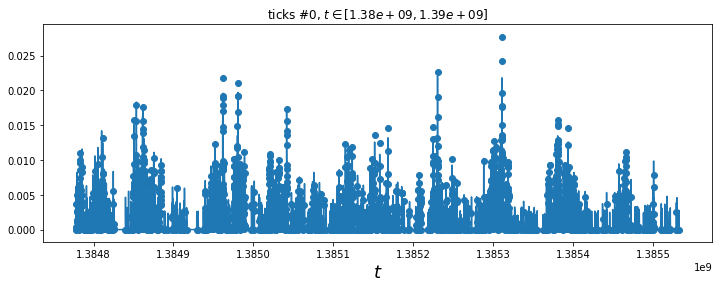

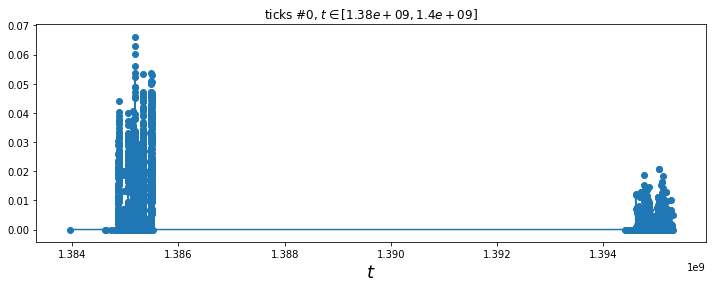

No. of test samples:  8
[1, 1, 1, 1, 1, 1, 1, 1]
Test accuracy:  0.625


In [58]:
X_train, y_train, X_test, y_test = load_timestamps(0.3)

genuine_kernel, fake_kernel = learn(X_train, y_train)

predict(X_test, y_test, genuine_kernel, fake_kernel)

In [ ]:
import os
import pickle

def load_retweets_delete_fb():
    dataset_location = os.path.join(os.getcwd(), 'Datasets', 'collected_data')
    with open(os.path.join(dataset_location,'labeled_users_deletefb.pickle'),'rb') as f:
        delete_fb = pickle.load(f)
    return delete_fb

In [ ]:
# experimental weighted 'hybrid' model of both timestamps (predicted by Hawkes) and a different 
# classification model for the other retweet features

delete_fb = load_retweets_delete_fb()

for key in delete_fb.keys():
    

In [ ]:
print(X_test)

In [53]:
import os
import json
import pandas as pd
from datetime import datetime
import time
import pickle

def get_timestamps_ASONAM(path, stringname):
    allFiles = os.listdir(path)
    data = {}
    count = 0
    for file in allFiles:
        count+=1
        print(count)
        with open(os.path.join(path, file),'r') as fr:
            retweeted_timestamps = []
            content = fr.read()
            useralltweets = json.loads(content)
            userid = -1
            if len(useralltweets) > 0:
                t = json.loads(useralltweets[0])
                userid = t['id']
#                 print(userid)
            for tweet in useralltweets:
                tweet = json.loads(tweet)
                if 'retweeted_status' in tweet.keys():
                    timestamp = tweet['created_at']
                    dt = datetime.strptime(timestamp, "%a %b %d %X %z %Y").timetuple()
    #                 print(dt)
                    timestamp = time.mktime(dt)
    #                 print(timestamp)
                    retweeted_timestamps.append(timestamp)
#             print(len(retweeted_timestamps))
            if userid != -1 and len(retweeted_timestamps) != 0:
                data[userid] = retweeted_timestamps
    with open(stringname + '.pickle','wb') as f:
        pickle.dump(data,f)
        f.close()

In [ ]:
path_fake = os.path.join(os.getcwd(), 'Datasets', 'ASONAM_18', 'tweets_fake')
pickle_name = 'ASONAM_user_timestamps_fake'
get_timestamps_ASONAM(path_fake, pickle_name)

In [ ]:
path_genuine = os.path.join(os.getcwd(), 'Datasets', 'ASONAM_18', 'tweets_genuine')
pickle_name = 'ASONAM_user_timestamps_genuine'
get_timestamps_ASONAM(path_genuine, pickle_name)

In [74]:
from sklearn.model_selection import train_test_split

with open(r"ASONAM_user_timestamps_fake.pickle", "rb") as input_file:
    fake_users = pickle.load(input_file)
    
with open(r"ASONAM_user_timestamps_genuine.pickle", "rb") as input_file:
    genuine_users = pickle.load(input_file)

fake_labels = [0]*len(fake_users.keys())
# print(fake_labels)
genuine_labels = [1]*len(genuine_users.keys())

y = fake_labels+genuine_labels
print(len(y))
X = []
for key in fake_users.keys():
    X.append(fake_users[key])
for key in genuine_users.keys():
    X.append(genuine_users[key])
print(len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(X_train), len(X_test))

# print(y_train)
# print(X_train[1])

1305
1305
874 431


In [76]:
# for LSTM model

max_len = 5000

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = pad_sequences(X_train, maxlen=max_len,padding='post')
X_test = pad_sequences(X_test,maxlen=max_len,padding='post')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

test_LSTM(X_train, y_train, X_test, y_test)

(874, 10000) (431, 10000) (874,) (431,)
(874, 5000) (431, 5000) (874,) (431,)
(874, 5000, 1)
(431, 5000, 1)
Creating model...
Compiling...
Fitting model...
Train on 611 samples, validate on 263 samples
Epoch 1/10
611/611 [==============================] - 43s 70ms/step - loss: 0.7250 - acc: 0.5057 - val_loss: 0.6910 - val_acc: 0.5741
Epoch 2/10
611/611 [==============================] - 43s 70ms/step - loss: 0.7082 - acc: 0.5139 - val_loss: 0.6844 - val_acc: 0.5741
Epoch 3/10
611/611 [==============================] - 42s 68ms/step - loss: 0.7118 - acc: 0.5155 - val_loss: 0.6846 - val_acc: 0.5741
Epoch 4/10
611/611 [==============================] - 42s 69ms/step - loss: 0.7041 - acc: 0.5319 - val_loss: 0.6853 - val_acc: 0.5741
Epoch 5/10
611/611 [==============================] - 42s 68ms/step - loss: 0.7041 - acc: 0.5205 - val_loss: 0.6837 - val_acc: 0.5741
Epoch 6/10
611/611 [==============================] - 41s 68ms/step - loss: 0.7150 - acc: 0.5221 - val_loss: 0.6838 - val_acc: 0

No. of training samples:  874
No. of genuine users:  480
No. of fake users:  394
For genuine retweet timestamps:
Estimated mu:  [9.71295141e-05]
Estimated alpha: [[0.49279461]]
Estimated coeffs:  [9.71295141e-05 4.92794606e-01]
For fake retweet timestamps:
Estimated mu:  [2.36528697e-05]
Estimated alpha: [[0.79240656]]
Estimated coeffs:  [2.36528697e-05 7.92406558e-01]
Simulating for genuine and fake and comparing with results...


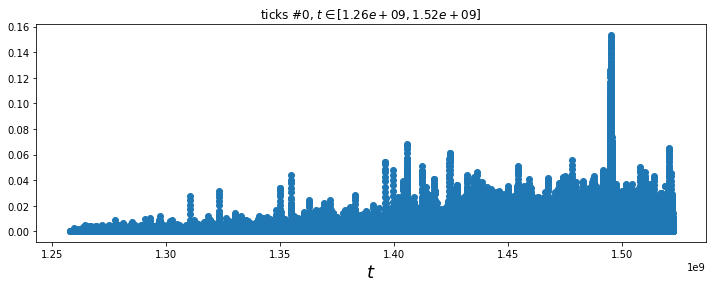

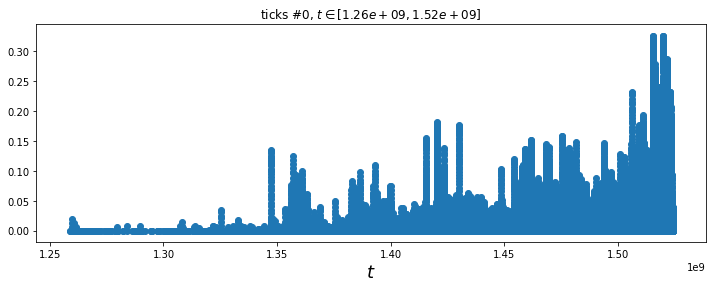

No. of test samples:  431
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [62]:
genuine_kernel, fake_kernel = learn(X_train, y_train)

predict(X_test, y_test, genuine_kernel, fake_kernel)

In [ ]:
import pandas as pd
import os
import json
import pickle

dataset_location = os.path.join(os.getcwd(), 'Datasets', 'collected_data')
df = pd.read_csv(os.path.join(dataset_location, 'user_timelines_final.csv'))

df = df[df['Fake/Genuine User'].notnull()]

# print(df)

df.describe()

labels = df['Fake/Genuine User'].tolist()
screennames = df['screen name'].tolist()

# print(labels)
# print(screennames)
# print(df1)

with open('user_to_tweets_info.json','r') as f:
    user_to_tweets_info = json.load(f)
    
# print(user_to_tweets_info)

labeling = {}

with open('tweets_#deletefacebook_readable.json') as f:
    
    ctr = 1
    for line in f:

        try:
            # if ctr==10:
            #   break
            tweet = json.loads(line)
#             print(tweet)
            user_name= tweet['user']['screen_name']
            if user_name in screennames:
#                 print(user_name)
                ctr+=1
#                 print(ctr)
                idx = screennames.index(user_name)
                user_id= tweet['user']['id']
#                 print(user_name)
                if (user_id, labels[idx]) in labeling.keys():
                    labeling[(user_id, labels[idx])].append(tweet)
                else:
                    labeling[(user_id, labels[idx])] = [tweet]
                
        except Exception as e:
#             print(e)
            continue
# print(labeling)
genuine = 0
fake = 0
for key in labeling.keys():
    print(key, " -> ", len(labeling[key]))
    if key[1] == 'fake':
        fake+=1
    else:
        genuine+=1
print("No. of users: ", len(labeling.keys()))
print("No. of fake users: ",fake)
print("No. of genuine users: ",genuine)
with open("labeled_users_deletefb.pickle","wb") as pickle_out:
    pickle.dump(labeling, pickle_out)

No. of users:  754
No. of fake users:  118
No. of genuine users:  636

In [15]:
# calculate retweet threads of the users under consideration, for ndsync purposes

import pickle
import os, json

dataset_location = os.path.join(os.getcwd(), 'Datasets', 'collected_data')

with open(os.path.join(dataset_location, "labeled_users_deletefb.pickle"),"rb") as pickle_in:
    labeled_users_deletefb = pickle.load(pickle_in)
    
labeling = list(labeled_users_deletefb.keys())

retweet_threads = {}

for x in labeling:
    retweet_threads[x[0]] = {} # this is going to be a dict of dictionaries (each dictionary: retweet thread, key: tweet id)

with open('tweets_#deletefacebook_readable.json') as f:
    
    ctr = 1
    for line in f:

        try:
            # if ctr==10:
            #   break
            tweet = json.loads(line)
#             print(tweet)
            user_id = tweet['user']['id']
            if user_id in retweet_threads.keys(): # user to be considered
#                 print(user_id)
                tweet_id = tweet['id']
                if tweet_id not in retweet_threads[user_id].keys() and 'retweeted_status' not in tweet.keys():
                    retweet_threads[user_id][tweet_id] = []
        except Exception as e:
#             print(e)
            continue
    
    print(len(retweet_threads))
    
    for key in retweet_threads.keys():
        print(key , " - > ", len(retweet_threads[key].keys())) #no. of original tweets by each user
    
    for line in f:
        try:
            # if ctr==10:
            #   break
            tweet = json.loads(line)
#             print(tweet)
            if 'retweeted_status' in tweet.keys():
                user_id_retweet = tweet['retweeted_status']['user']['id'] #original tweet's user
                tweet_id_retweet = tweet['retweeted_status']['id'] # original tweet's id
                if user_id_retweet in retweet_threads.keys(): #if original tweet's user is a reqd user
                    print('Hello') # doesn't reach here even once
                    #it is a retweet whose original tweet belongs to one of the users under inspection
                    if tweet_id_retweet in retweet_threads[user_id_retweet].keys():
                        retweet_threads[user_id_retweet][tweet_id_retweet].append(tweet)
                    else:
                        retweet_threads[user_id_retweet][tweet_id_retweet] = [tweet]
        except Exception as e:
            print(e)
            continue
    
print(retweet_threads)
    
with open("retweet_threads.pickle","wb") as pickle_out:
    pickle.dump(retweet_threads, pickle_out)

754
974778569204232192  - >  2
971575762561196032  - >  1
24787367  - >  13
733872157399228416  - >  12
750868791752593408  - >  11
256184059  - >  11
949907180710330368  - >  1
950394738758377472  - >  10
915018504738344960  - >  13
757446816870830080  - >  2
735148471376830464  - >  11
970197462429286400  - >  12
953940270407548928  - >  0
227394952  - >  0
1658650404  - >  11
1050455592  - >  1
757274031519363072  - >  11
90822567  - >  14
751482605334241280  - >  0
772899092842307584  - >  11
295211634  - >  0
975623023335063557  - >  0
772896788768559104  - >  11
635769313  - >  0
955666705300279297  - >  0
223610043  - >  0
18851974  - >  13
2884771  - >  14
395791785  - >  0
2941975261  - >  11
104520454  - >  0
359017598  - >  6
949138183224045569  - >  0
21389328  - >  3
3076354202  - >  3
2199915756  - >  12
27494637  - >  2
546910610  - >  13
856923191926824961  - >  0
815247619178033153  - >  16
189806241  - >  0
1543400209  - >  14
1252806792  - >  20
3376655241  - >  12
1

In [ ]:
# different approach to identifying retweet threads:
# 1. for every user, compare with every other user
# 2. If they have retweeted the same tweet, add both tweets to a thread
# 3. Label the thread fake if either of the users is fake

import pickle, json
import os

dataset_location = os.path.join(os.getcwd(), 'Datasets', 'collected_data')

with open(os.path.join(dataset_location, "labeled_users_deletefb.pickle"),"rb") as pickle_in:
    labeled_users_deletefb = pickle.load(pickle_in)
    
retweet_threads = {}
labels = {}

    
for key_i in labeled_users_deletefb.keys():
    user_id_i, label_i = key_i[0], key_i[1]
    tweets1 = labeled_users_deletefb[key_i]
    for tweet_i in tweets1:
        for key_j in labeled_users_deletefb.keys():
            user_id_j, label_j = key_j[0], key_j[1]
            tweets2 = labeled_users_deletefb[key_j]
            for tweet_j in tweets2:
                if tweet_i != tweet_j and 'retweeted_status' in tweet_i.keys() and 'retweeted_status' in tweet_j.keys() and tweet_i['retweeted_status']['id'] == tweet_j['retweeted_status']['id']:
                    user_id = tweet_i['retweeted_status']['user']['id']
                    tweet_id = tweet_i['retweeted_status']['id']
                    if user_id in retweet_threads.keys():
                        if tweet_id not in retweet_threads[user_id].keys():
                            retweet_threads[user_id][tweet_id] = [tweet_i, tweet_j]
                        else:
                            retweet_threads[user_id][tweet_id].append(tweet_i)
                            retweet_threads[user_id][tweet_id].append(tweet_j)
                    else:
                        retweet_threads[user_id] = {}
                        retweet_threads[user_id][tweet_id] = [tweet_i, tweet_j]
                    
                    if key_i[1] == 'fake' or key_j[1] == 'fake':
                        labels[user_id] = 'fake'
                    else:
                        labels[user_id] = 'genuine'
print(len(retweet_threads))

for key in retweet_threads.keys():
    print(key)
    for key2 in retweet_threads[key].keys():
        retweet_threads[key][key2] = list(set(retweet_threads[key][key2]))
        print(key2, ' -> ', len(retweet_threads[key][key2]))

retweet_threads_new = {}
for key in retweet_threads.keys():
    retweet_threads_new[(key, labels[key])] = retweet_threads[key]
    
with open("retweet_threads_new.pickle","wb") as pickle_out:
    pickle.dump(retweet_threads, pickle_out)

In [31]:
new_ = {}
for key in retweet_threads_new.keys():
    print(key)
    new_[key] = {}
    for key2 in retweet_threads_new[key].keys():
        a = list(set(retweet_threads_new[key][key2]))
        new_[key][key2] = a
        print(key2, ' -> ', len(new_[key][key2]))

(24787367, 'genuine')


TypeError: unhashable type: 'dict'

In [ ]:
import pickle
import os

dataset_location = os.path.join(os.getcwd(), 'Datasets', 'collected_data')

with open(os.path.join(dataset_location, "labeled_users_deletefb.pickle"),"rb") as pickle_in:
    labeled_users_deletefb = pickle.load(pickle_in)
    
retweet_threads = 

    
    
for key in labeled_users_deletefb.keys():
    user_id, label = key[0], key[1]
    tweets = labeled_users_deletefb[key] #array of tweets (not necessarily rts) associated with user
    
    retweetThread = [tweet for tweet in tweets if 'retweet_status' in tweet.keys()] 
    ###################### NOOOOOOOOO
    
    
    retweet_creation_times = []
        try:
            for rts in retweetThread:

                retweet_creation_times.append(rts._json['created_at'])


            print(retweet_creation_times)
            retweet_creation_times.reverse()

            # Get first retweet
            first_retweet_creation_time = time.strptime(retweet_creation_times[0], "%a %b %d %H:%M:%S +0000 %Y")
            
            # Get last retweet
            last_retweet_creation_time = time.strptime(retweet_creation_times[-1], "%a %b %d %H:%M:%S +0000 %Y")

            # Calculate features
            feature_retweets = orig_tweetDetails['retweet_count']
            feature_response_time = (time.mktime(first_retweet_creation_time) - time.mktime(orig_tweet_creation_time))
            
            lifespan = (time.mktime(last_retweet_creation_time) - time.mktime(first_retweet_creation_time))

            retweets_inter_arrival_times = [time.mktime(time.strptime(j, "%a %b %d %H:%M:%S +0000 %Y"))-time.mktime(time.strptime(i, "%a %b %d %H:%M:%S +0000 %Y")) for i, j in zip(retweet_creation_times[:-1], retweet_creation_times[1:])]
            q_75 = int(0.75 * len(retweets_inter_arrival_times))
            q_25 = int(0.25* len(retweets_inter_arrival_times))
            q_50 = int(0.50* len(retweets_inter_arrival_times))

            arr_mad = robust.mad(retweets_inter_arrival_times)
            iqr = np.subtract(*np.percentile(retweets_inter_arrival_times, [q_75, q_25]))

            rt_q3_reponse_time = (time.mktime(time.strptime(retweet_creation_times[q_75], "%a %b %d %H:%M:%S +0000 %Y")) - time.mktime(orig_tweet_creation_time))
            rt_q2_reponse_time = (time.mktime(time.strptime(retweet_creation_times[q_50], "%a %b %d %H:%M:%S +0000 %Y")) - time.mktime(orig_tweet_creation_time))

            features_ndsync = [files[:-5], feature_retweets, feature_response_time, lifespan, rt_q3_reponse_time, rt_q2_reponse_time, arr_mad, iqr]

            if arr_mad != 0.0:
                with open("a_final-features-genuine.csv", "a+") as f:
                    writer = csv.writer(f)
                    writer.writerow(features_ndsync)
                    

        except Exception,e:
            print str(e)

In [36]:
timestamps = df1['timestamp'].values
# print(timestamps[:30])
timestamps2 = df2['timestamp'].values
# print(timestamps2[:30])

timestamps = [float(x) for x in timestamps]
timestamps1 = [[np.array(timestamps)]]
timestamps2 = list(np.array(timestamps2))

print(timestamps1)

[[array([1.37762593e+09, 1.37762818e+09, 1.37763220e+09, ...,
       1.38553609e+09, 1.38553614e+09, 1.38554068e+09])]]


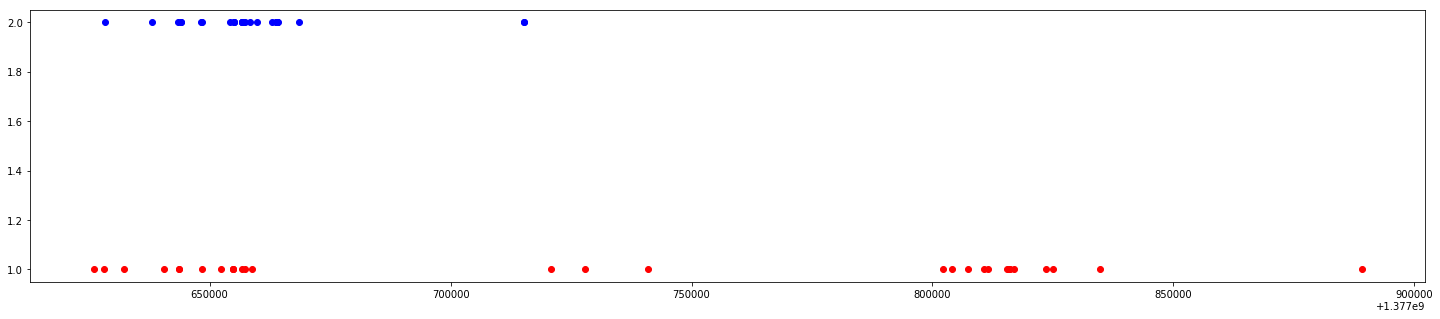

In [36]:
plt.figure(figsize=(25,5))
y = [1]*len(timestamps[:30])
plt.plot(timestamps[:30], y[:30], 'ro')
y2 = [2]*len(timestamps2[:30])
plt.plot(timestamps2[:30], y2[:30], 'bo')

In [ ]:
decays = 0.01


timestamps1 = x

learner = HawkesExpKern(decays, penalty='l2', C=0.01)
learner.fit(timestamps1)

# est = learner.estimated_intensity(timestamps1,intensity_track_step=1)

# print(est)

# k = learner.get_kernel_values(0,0,np.array(timestamps))
# print(list(k))

print(learner.)

plot_hawkes_kernels(learner)

<class 'tick.base.timefunc.TimeFunction'>


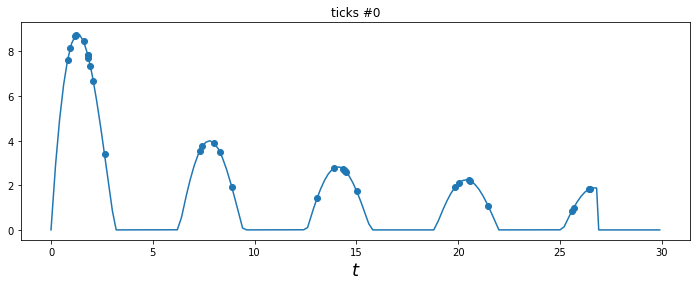

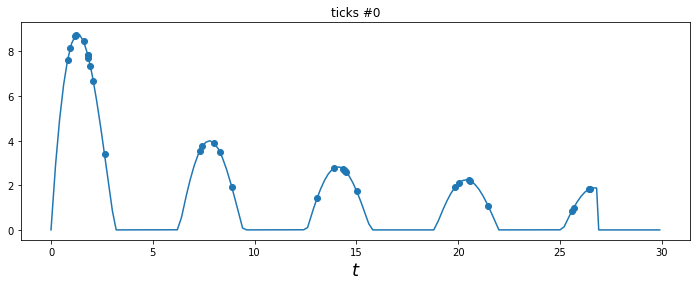

In [10]:
run_time = 30

T = np.arange((run_time * 0.9) * 5, dtype=float) / 5
Y = np.maximum(15 * np.sin(T) * (np.divide(np.ones_like(T),
                                           np.sqrt(T + 1) + 0.1 * T)), 0.001)

tf = TimeFunction((T, Y), dt=0.01)

print(type(tf))
# We define a 1 dimensional inhomogeneous Poisson process with the
# intensity function seen above
in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)


# We activate intensity tracking and launch simulation
in_poi.track_intensity(0.1)
in_poi.simulate()

# We plot the resulting inhomogeneous Poisson process with its
# intensity and its ticks over time
tick.plot.plot_point_process(in_poi)

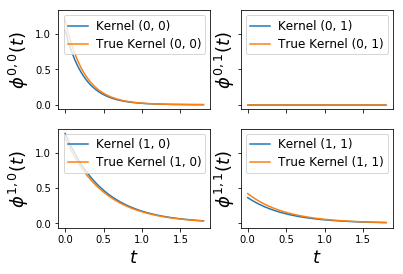

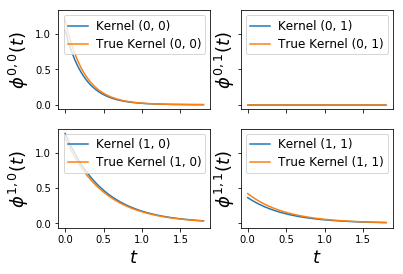

In [53]:
from tick.plot import plot_hawkes_kernels
from tick.hawkes import SimuHawkesExpKernels, SimuHawkesMulti, HawkesExpKern
import matplotlib.pyplot as plt

end_time = 1000
n_realizations = 10

decays = [[4., 1.], [2., 2.]]
baseline = [0.12, 0.07]
adjacency = [[.3, 0.], [.6, .21]]

hawkes_exp_kernels = SimuHawkesExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=False, seed=1039)

multi = SimuHawkesMulti(hawkes_exp_kernels, n_simulations=n_realizations)

multi.end_time = [(i + 1) / 10 * end_time for i in range(n_realizations)]
multi.simulate()

learner = HawkesExpKern(decays, penalty='l1', C=10)
learner.fit(multi.timestamps)

plot_hawkes_kernels(learner, hawkes=hawkes_exp_kernels)

--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 2.31e-03 seconds.
[236.16868879 347.88637262 358.21379421 361.97902432 366.27765209
 399.46655993 412.01356806 416.10443512 486.67896265 581.07961706
 596.99420798 597.98640996 599.00109959]


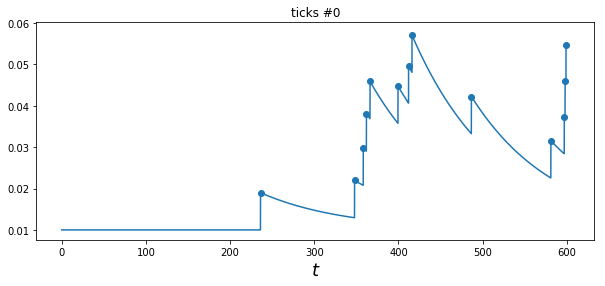

In [3]:
#define an exponential kernel for my hawkes process
# for simulation : Use SimuHawkesExpKernels 
import tick
from tick.hawkes import SimuHawkesExpKernels
import matplotlib.pyplot as plt
from tick.plot import plot_point_process

n_nodes=1;
baseline=[0.01];
adjacency=[[0.9]];
decays= 0.01
end_time=600;
# max_jumps=1000;

a_sim=SimuHawkesExpKernels(adjacency, decays, baseline=baseline, end_time=end_time, verbose=True)
a_sim.track_intensity(0.1)

a_sim.simulate()
print (a_sim.timestamps[0])


# print (a_sim.simulation_time)
# print (a_sim.n_total_jumps)
# print (a_sim.tracked_intensity)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_point_process(a_sim, ax=ax)
plt.show()

In [7]:
from tick.plot import plot_hawkes_kernels
from tick.hawkes import SimuHawkesExpKernels, SimuHawkesMulti, HawkesExpKern
import matplotlib.pyplot as plt

end_time = 1.3e+05
n_realizations = 10

decays = 3.
baseline = [0.12, 0.07]
adjacency = [[.3, 0.], [.6, .21]]

hawkes_exp_kernels = SimuHawkesExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=False, seed=1039)

multi = SimuHawkesMulti(hawkes_exp_kernels, n_simulations=n_realizations)

multi.end_time = [(i + 1) / 10 * end_time for i in range(n_realizations)]
multi.simulate()

learner = HawkesExpKern(decays, penalty='l1', C=10, gofit='likelihood', 
                        verbose=True, tol=1e-11, solver='svrg', step=1e-3)
print(multi.timestamps)
learner.fit(multi.timestamps, start=0.1)

# plot_hawkes_kernels(learner, hawkes=hawkes_exp_kernels)

[[array([1.15548319e+00, 5.00557993e+00, 1.22625256e+01, ...,
       1.29504795e+04, 1.29818797e+04, 1.29948022e+04]), array([1.37803383e+00, 1.64713184e+00, 2.63211712e+01, ...,
       1.29923062e+04, 1.29928273e+04, 1.29948340e+04])], [array([7.21966896e+00, 1.78829838e+01, 3.16234234e+01, ...,
       2.59947898e+04, 2.59954825e+04, 2.59995330e+04]), array([9.54036700e+00, 1.35858744e+01, 1.79852944e+01, ...,
       2.59930850e+04, 2.59956402e+04, 2.59960070e+04])], [array([2.02771776e+01, 4.04243146e+01, 8.55550523e+01, ...,
       3.89810214e+04, 3.89811988e+04, 3.89840623e+04]), array([3.45953295e-01, 9.16114499e+00, 2.09900505e+01, ...,
       3.89798956e+04, 3.89837939e+04, 3.89841336e+04])], [array([1.20665398e+01, 1.51740264e+01, 1.54488199e+01, ...,
       5.19692688e+04, 5.19804782e+04, 5.19823785e+04]), array([1.45207936e+01, 1.52977024e+01, 2.10412214e+01, ...,
       5.19481964e+04, 5.19593831e+04, 5.19830856e+04])], [array([5.90551236e+00, 1.16574850e+01, 3.17783978e+01,

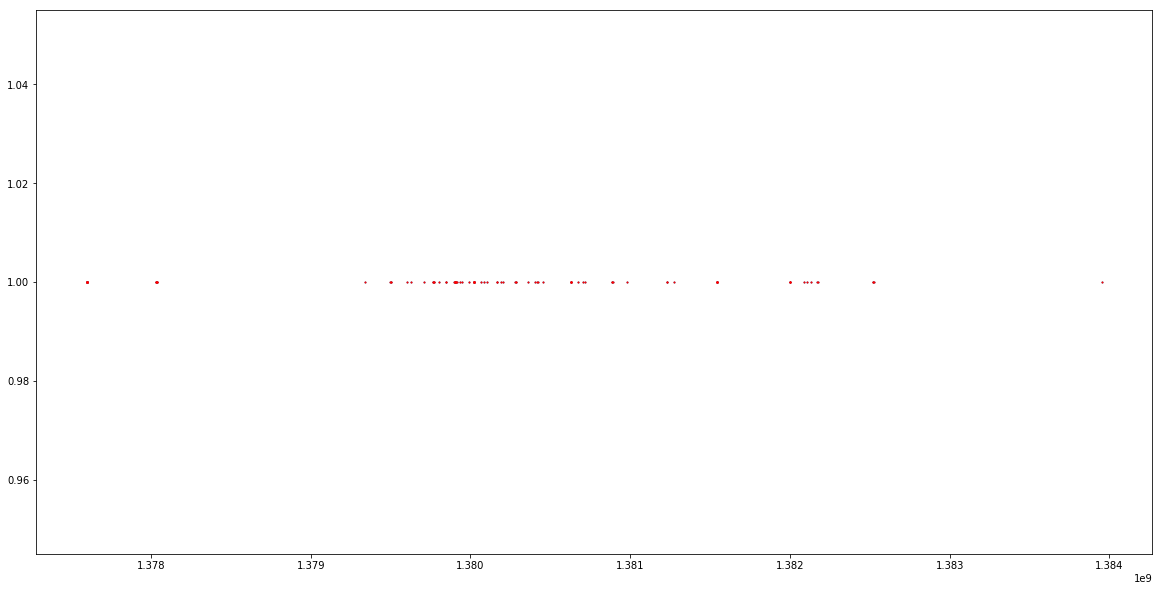

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

user_to_timestamps={}

normalizer=10e9


for root,dir_names,f_names in os.walk('data'):

	for name in f_names:
		# print name
		data=[]
		# root_spl=root.split('/')
		path=os.path.join(root,name)
		with open(path) as f:

			for line in f:
				line=line[:-1]

				if line.split('\t')[2]!='timestamp':
					
					time_stamp=int(line.split('\t')[2])
					data.append(time_stamp)

		user_to_timestamps[name]=data

				# exit()

# print user_to_timestamps['u11.txt']


plt.figure(figsize=(20,10))
ctr=1

num_points=100

for user in user_to_timestamps:
	if user=='u11.txt':
		# pass
		fx=[ctr for i in range(len(user_to_timestamps[user][:num_points]))]
		plt.plot(user_to_timestamps[user][:num_points],fx,'o',markersize=1)
		ctr+=1

plt.plot(user_to_timestamps['u11.txt'][:num_points],fx,'ro',markersize=1)
plt.show()
# print X[-1]

with open('user_to_timestamps.pickle','wb') as f:
	pickle.dump(user_to_timestamps['u11.txt'][:num_points],f)
	f.close()

In [1]:
from tick.hawkes import HawkesExpKern
import numpy as np
from tick.hawkes import SimuHawkesExpKernels
import matplotlib.pyplot as plt
from tick.plot import plot_point_process
import pickle

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm


with open("user_to_timestamps.pickle",'rb') as f:
	u11_timestamps= pickle.load(f)
	f.close()

min_t = min(u11_timestamps)
max_t = max(u11_timestamps)

print(len(u11_timestamps))
print(min_t, max_t)
u11_timestamps = sorted([(t-min_t)/max_t for t in u11_timestamps])
u11_timestamps = normalize(u11_timestamps)
threshold = 1e-03
u11_timestamps = u11_timestamps[u11_timestamps>threshold]
print(u11_timestamps)
# fx=[1 for i in range(len(u11_timestamps))]
# plt.plot(u11_timestamps,fx,'ro',markersize=1)
plt.show()

decays=0.5
gofit='least-squares'
penalty='l2'
C=1e3
solver='gd'
step=None
tol=1e-05
max_iter=1000;
verbose=False
print_every=10
random_state=None
elastic_net_ratio=0.95

a_kernel=HawkesExpKern(decays, gofit=gofit, penalty=penalty, C=C, solver=solver, step=step, tol=tol, max_iter=max_iter, verbose=verbose, print_every=print_every, elastic_net_ratio=elastic_net_ratio, random_state=random_state)


u11_timestamps=1.0*np.array(u11_timestamps)

list_of_timestamps=[]

list_of_timestamps.append(u11_timestamps)

min_t = min(u11_timestamps)
a_kernel.fit(list_of_timestamps, start=min_t)

print(a_kernel.n_nodes)
print(a_kernel.baseline)
print(a_kernel.adjacency)
# print(a_kernel.coeffs)

end_time=max(u11_timestamps);
print(end_time)
start_time=min(u11_timestamps)
print(start_time)
a_sim=SimuHawkesExpKernels(a_kernel.adjacency, decays, baseline=a_kernel.baseline, end_time=end_time, force_simulation=True, verbose=True)
a_sim.track_intensity(0.1)

a_sim.simulate()
# print (a_sim.timestamps)
# print (a_sim.simulation_time)
# print (a_sim.n_total_jumps)
# print (a_sim.tracked_intensity)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_point_process(a_sim, ax=ax)
# plt.show()

n_nodes=1;
baseline=[0.01];
adjacency=[[0.1]];
decays= 0.1

a_sim=SimuHawkesExpKernels(adjacency, decays, baseline=baseline, end_time=end_time, verbose=True)
a_sim.track_intensity(0.1)

a_sim.simulate()
print (len(a_sim.timestamps[0]))
plot_point_process(a_sim, ax=ax)
plt.show()


100
1377600177 1383952009
[0.01503065 0.01503068 0.01509754 0.015165   0.015165   0.015165
 0.06056614 0.0661479  0.06621375 0.06628079 0.06976864 0.07066697
 0.07353155 0.07550302 0.07550309 0.07556685 0.07557302 0.07670912
 0.07818588 0.07838122 0.08010366 0.08016851 0.08016854 0.08023122
 0.08023126 0.08023129 0.08048628 0.08054892 0.08069063 0.08132178
 0.08166544 0.08318974 0.08428012 0.0843435  0.08441173 0.08441193
 0.08448099 0.08448103 0.08448525 0.08448678 0.08601208 0.08660807
 0.08730546 0.08941328 0.08947586 0.09022694 0.09069509 0.09341448
 0.09347723 0.09354096 0.09609668 0.09774031 0.09807477 0.09824376
 0.09951892 0.10547103 0.10547107 0.1055188  0.10553476 0.1055348
 0.10705491 0.10805832 0.10856035 0.11439173 0.11452009 0.11468535
 0.11771641 0.12640557 0.12640888 0.12793968 0.13731916 0.13731923
 0.13738345 0.13738351 0.13738355 0.13738355 0.15327549 0.15333692
 0.15333702 0.15333713 0.15627825 0.15694724 0.15780383 0.15910241
 0.15931903 0.17148158 0.17148161 0.171

/home/aditya/anaconda3/lib/python3.6/site-packages/tick/base/learner/learner_optim.py:391: RuntimeWarning: Penalty "l2" has no elastic_net_ratio attribute
  self.penalty, RuntimeWarning)


--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 6.95e-02 seconds.
0


--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 8.05e-03 seconds.
140
--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 7.64e-03 seconds.


/home/aditya/anaconda3/lib/python3.6/site-packages/tick/base/learner/learner_optim.py:391: RuntimeWarning: Penalty "l2" has no elastic_net_ratio attribute
  self.penalty, RuntimeWarning)


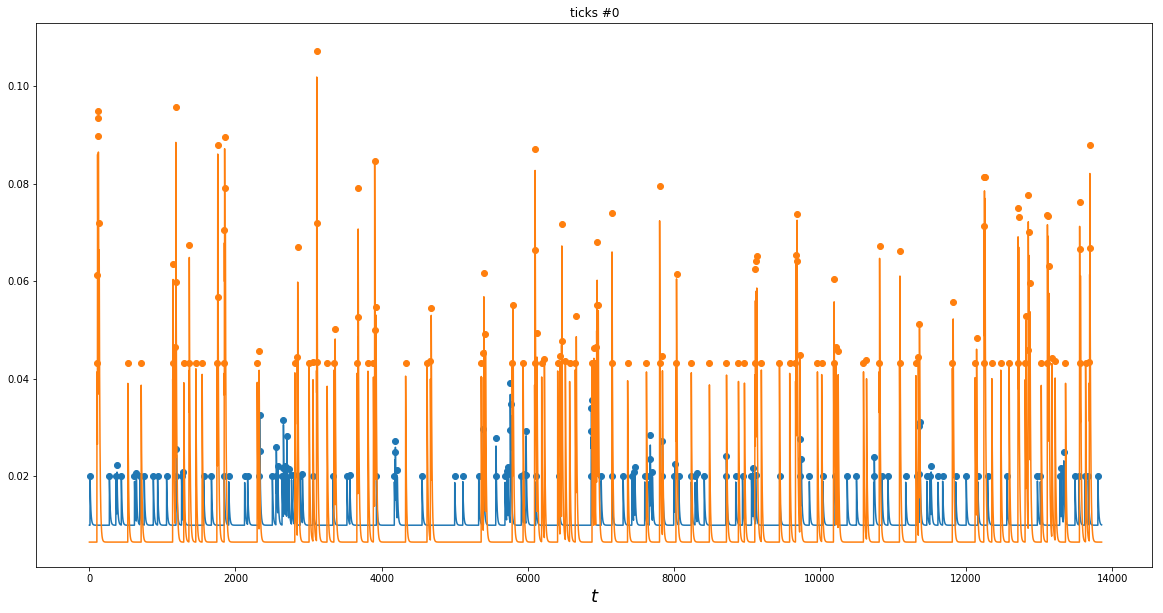

In [3]:
#define an exponential kernel for my hawkes process
# for simulation : Use SimuHawkesExpKernels 
import tick
from tick.hawkes import SimuHawkesExpKernels
import matplotlib.pyplot as plt
from tick.plot import plot_point_process
from tick.hawkes import HawkesExpKern



n_nodes=1;
baseline=[0.01];
adjacency=[[0.1]];
decays= 0.1
end_time=1.38553473e+04;
# max_jumps=1000;

a_sim=SimuHawkesExpKernels(adjacency, decays, baseline=baseline, end_time=end_time, verbose=True)
a_sim.track_intensity(0.1)

a_sim.simulate()
print (len(a_sim.timestamps[0]))
# print (a_sim.simulation_time)
# print (a_sim.n_total_jumps)
# print (a_sim.tracked_intensity)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_point_process(a_sim, ax=ax)
# plt.show()

decays=0.1

gofit='least-squares'
penalty='l2'
C=1e3
solver='gd'
step=None
tol=1e-04
max_iter=1000;
verbose=False
print_every=10
random_state=None
elastic_net_ratio=0.9

a_kernel=HawkesExpKern(decays, gofit=gofit, penalty=penalty, C=C, solver=solver, step=step, tol=tol, max_iter=max_iter, verbose=verbose, print_every=print_every, elastic_net_ratio=elastic_net_ratio, random_state=random_state)

# list_of_timestamps.append(b)

a_kernel.fit(a_sim.timestamps)


# end_time=1.38553473e+04;


test_sim=SimuHawkesExpKernels(a_kernel.adjacency, decays, baseline=a_kernel.baseline, end_time=end_time, verbose=True)
test_sim.track_intensity(0.1)

test_sim.simulate()
# print (a_sim.timestamps)
# print (a_sim.simulation_time)
# print (a_sim.n_total_jumps)
# print (a_sim.tracked_intensity)

# fig, ax = plt.subplots(test_sim.n_nodes, 1, figsize=(20, 10))
plot_point_process(test_sim, ax=ax)

plt.show()